# M8 Project

In this project you will compare the performance of LDA, SVM, and CNN for face recognition. You will use the Olivetti faces dataset, which contains 400 64x64 images from 40 different subjects, and your task is to discover the identity of a given face image. Some of these images are illustrated below.

<img src="m8project.png" width="400"/>

An initial version of the code with the problem specification (below) and a report template are available (at the bottom). Deliverables are the final code (non-functioning code is worth 0 points) and the comparison report.

Solve the task above using:
- LDA
- SVM
- CNN (40pts) - suggested architecture: LeNet-5

Split the dataset so that the first 8 images per subject are used for training, and the last 2 images are used for testing. If you need a validation set, use part of your training data. For CNN:
- Plot the loss and the accuracy for each training epoch (20pts)
- Store the model with highest accuracy in the validation set (10pts)

Compare the performance of LDA, SVM, and CNN in terms of:
- Average F-Score (15pts)
- Confusion matrix (15pts)

# Implementation

You are free to change the code below as needed.

2023-07-23 20:12:49.291332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(400, 64, 64)
(320, 64, 64, 1) (80, 64, 64, 1)


Epoch 1/1000
8/9 [=========================>....] - ETA: 0s - loss: 3.6898 - accuracy: 0.0195
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.hdf5
9/9 [==============================] - 1s 63ms/step - loss: 3.6899 - accuracy: 0.0174 - val_loss: 3.6917 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/9 [=========>....................] - ETA: 0s - loss: 3.6888 - accuracy: 0.0208    

/Users/victor/micromamba/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - ETA: 0s - loss: 3.6890 - accuracy: 0.0139
Epoch 2: val_accuracy did not improve from 0.00000
9/9 [==============================] - 0s 34ms/step - loss: 3.6890 - accuracy: 0.0139 - val_loss: 3.6938 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - ETA: 0s - loss: 3.6887 - accuracy: 0.0243
Epoch 3: val_accuracy did not improve from 0.00000
9/9 [==============================] - 0s 30ms/step - loss: 3.6887 - accuracy: 0.0243 - val_loss: 3.6968 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - ETA: 0s - loss: 3.6882 - accuracy: 0.0278
Epoch 4: val_accuracy did not improve from 0.00000
9/9 [==============================] - 0s 31ms/step - loss: 3.6882 - accuracy: 0.0278 - val_loss: 3.6995 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - ETA: 0s - loss: 3.6880 - accuracy: 0.0278
Epoch 5: val_accuracy did not improve from 0.00000
9/9 [==============================] 

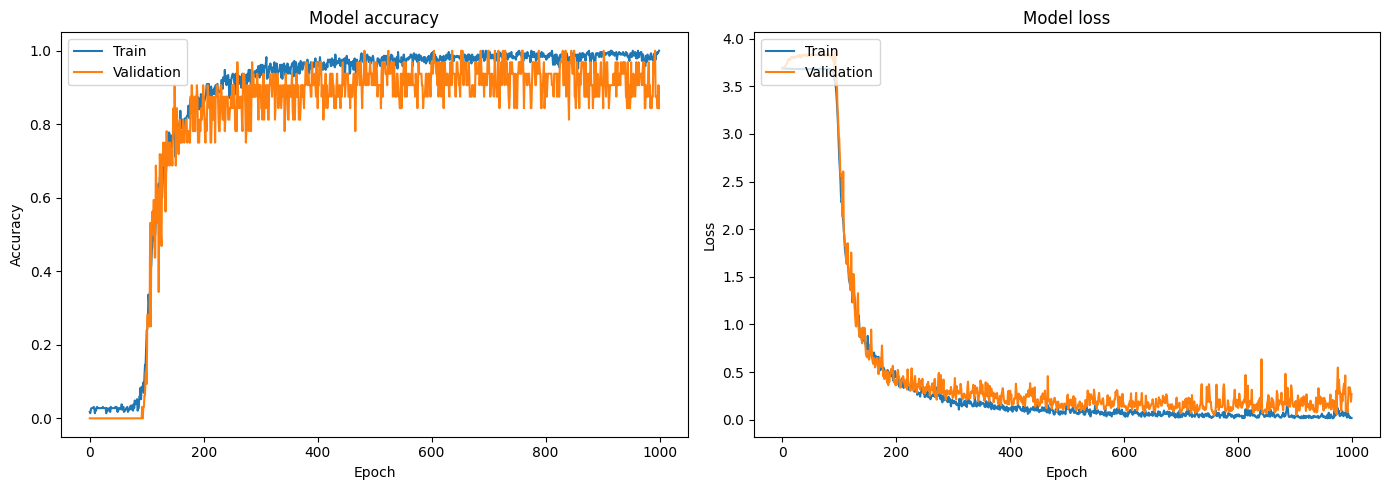

LDA F-Score: 0.975
SVM F-Score: 0.7
CNN F-Score: 0.9
LDA Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
SVM Confusion Matrix:
 [[1 0 0 ... 1 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [1 0 0 ... 0 0 0]]
CNN Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


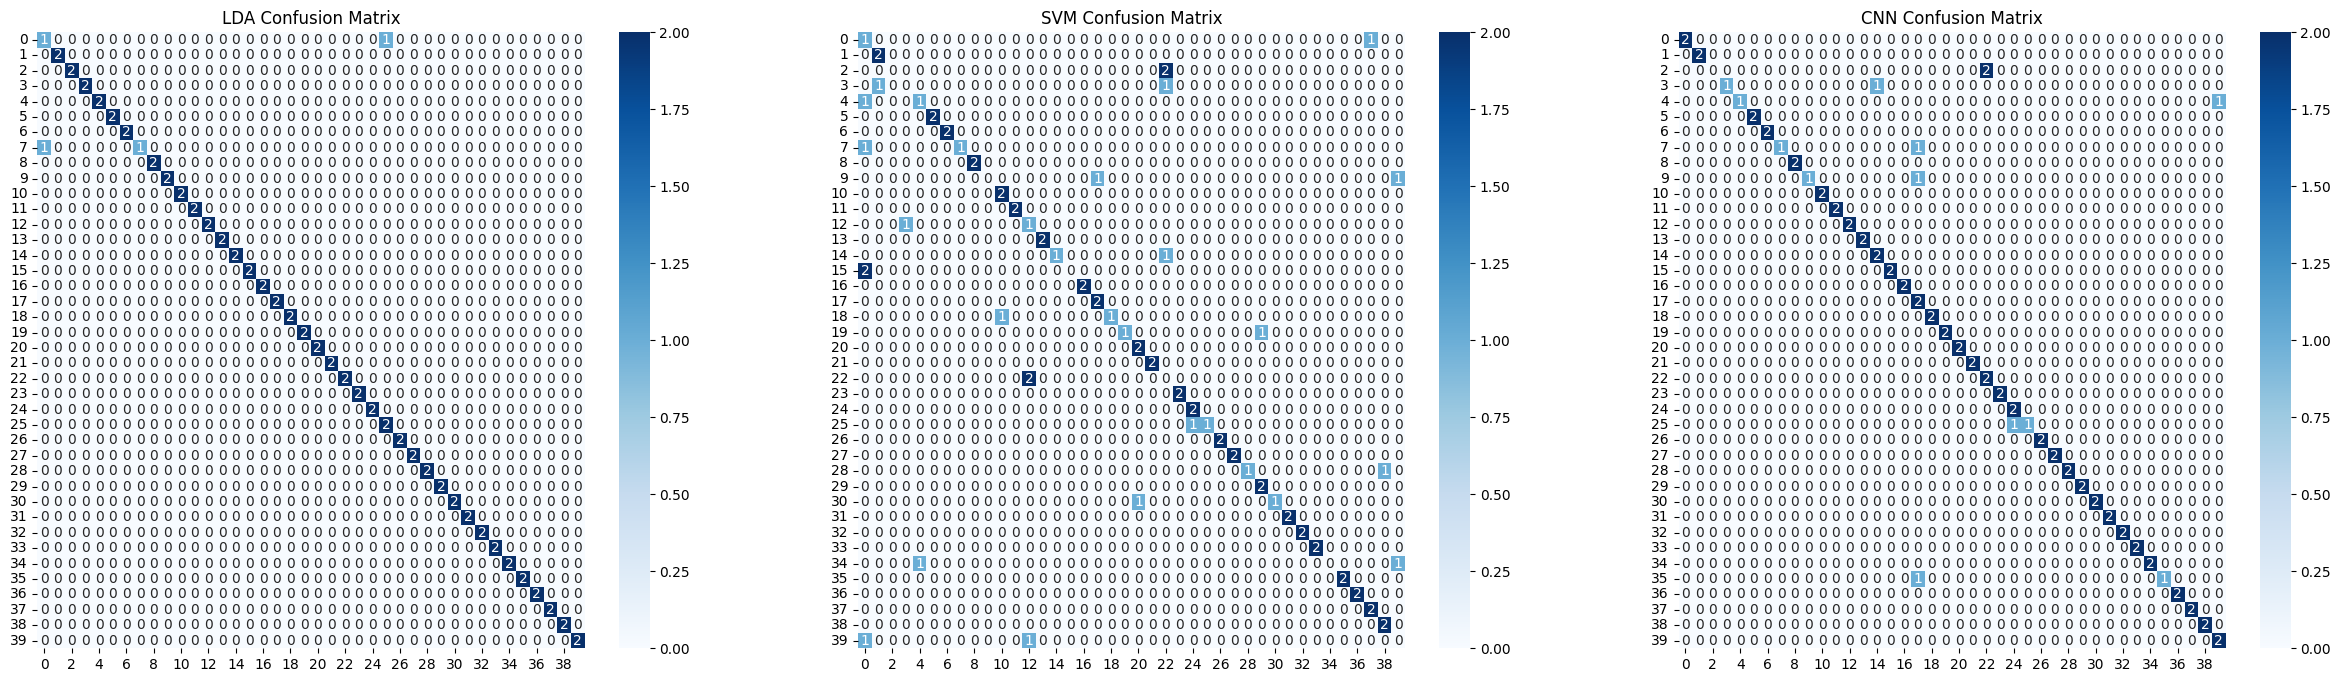

TRAINING


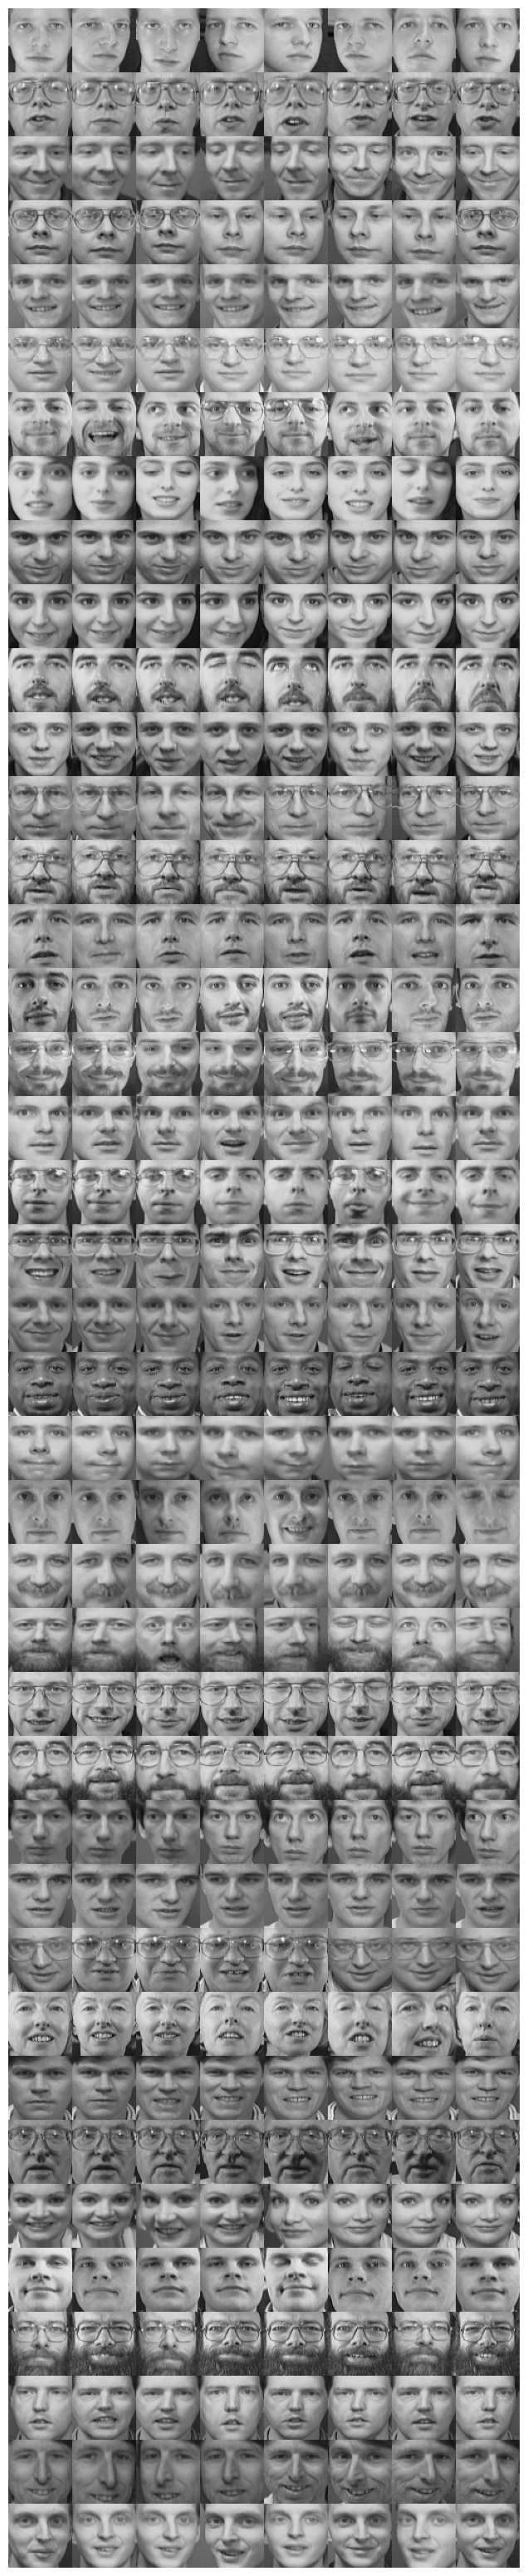

TESTING


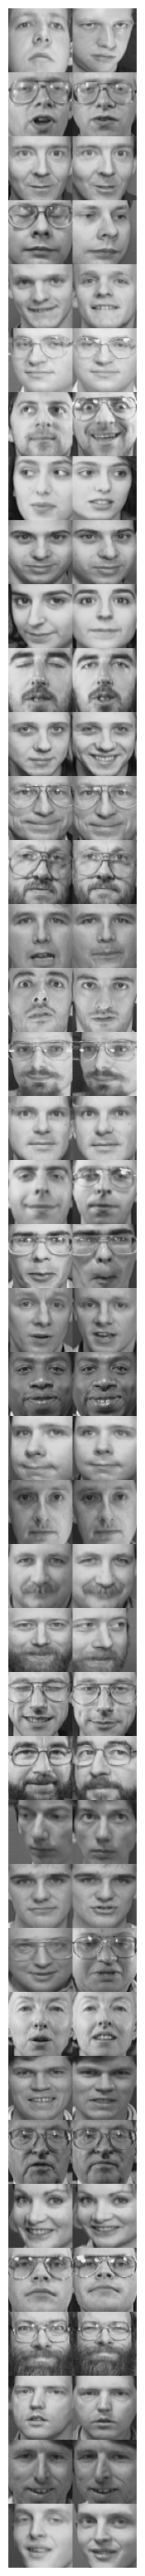

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import seaborn as sns
from tensorflow.keras.layers import Dropout


# Get the dataset
faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)

# Split the dataset
N_IDENTITIES = len(np.unique(faces.target))  # Number of different individuals in the dataset
GALLERY_SIZE = 8  # Number of images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
    indices = list(np.where(faces.target == i)[0])
    gallery_indices += indices[:GALLERY_SIZE]
    probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)  # Training images
x_train = x_train / 255.0  # Normalize the images to [0, 1]
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)  # Test images
x_test = x_test / 255.0  # Normalize the images to [0, 1]
y_test = faces.target[probe_indices]

# split the training data into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


print(x_train.shape, x_test.shape)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x_train.reshape(len(x_train), -1), y_train)  # Flatten input for LDA
lda_predictions = lda.predict(x_test.reshape(len(x_test), -1))

# SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(x_train.reshape(len(x_train), -1), y_train)  # Flatten input for SVM
svm_predictions = svm.predict(x_test.reshape(len(x_test), -1))


learning_rate = 0.0001 


# CNN model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 1)))
model.add(AveragePooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=N_IDENTITIES, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1)
history = model.fit(x_train_split, y_train_split, epochs=1000, validation_data=(x_val_split, y_val_split), callbacks=[checkpoint]) # Increase epochs to 1000
model.load_weights("best_model.hdf5")  # Load the weights of the best model based on validation accuracy
cnn_predictions = np.argmax(model.predict(x_test), axis=-1)

# Plot loss and accuracy for each epoch
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Performance Metrics
lda_fscore = f1_score(y_test, lda_predictions, average='micro')
svm_fscore = f1_score(y_test, svm_predictions, average='micro')
cnn_fscore = f1_score(y_test, cnn_predictions, average='micro')
lda_cm = confusion_matrix(y_test, lda_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)
cnn_cm = confusion_matrix(y_test, cnn_predictions)

# Print F-Score and Confusion Matrix
print("LDA F-Score:", lda_fscore)
print("SVM F-Score:", svm_fscore)
print("CNN F-Score:", cnn_fscore)

print("LDA Confusion Matrix:\n", lda_cm)
print("SVM Confusion Matrix:\n", svm_cm)
print("CNN Confusion Matrix:\n", cnn_cm)

# Visualize Confusion Matrices
fig, axs = plt.subplots(1, 3, figsize=(30, 8))
sns.heatmap(lda_cm, ax=axs[0], annot=True, fmt='d', cmap='Blues')
axs[0].set_title('LDA Confusion Matrix')
sns.heatmap(svm_cm, ax=axs[1], annot=True, fmt='d', cmap='Blues')
axs[1].set_title('SVM Confusion Matrix')
sns.heatmap(cnn_cm, ax=axs[2], annot=True, fmt='d', cmap='Blues')
axs[2].set_title('CNN Confusion Matrix')
plt.show()

# Visualize image sets
def show_images(imgs, num_rows, num_cols):
    assert len(imgs) == num_rows * num_cols

    full = None
    for i in range(num_rows):
        row = None
        for j in range(num_cols):
            if row is None:
                row = imgs[i * num_cols + j].reshape(img_height, img_width) * 255.0
            else:
                row = np.concatenate((row, imgs[i * num_cols + j].reshape(img_height, img_width) * 255.0), axis=1)
        if full is None:
            full = row
        else:
            full = np.concatenate((full, row), axis=0)

    f = plt.figure(figsize=(num_cols, num_rows))
    plt.imshow(full, cmap='gray')
    plt.axis('off')
    plt.show()

print('TRAINING')
show_images(x_train, N_IDENTITIES, GALLERY_SIZE)
print('TESTING')
show_images(x_test, N_IDENTITIES, 10 - GALLERY_SIZE)


# Report template

## Experimental results

## Training Description
Three machine learning models, Linear Discriminant Analysis (LDA), Support Vector Machines (SVM), and a Convolutional Neural Network (CNN) were implemented and trained on the Olivetti faces dataset.

The Convolutional Neural Network (CNN) was trained over 1000 epochs with a batch size of 32. The model's architecture was based on LeNet-5, a classic CNN structure, which includes convolutional layers, average pooling layers, and fully connected layers.

Throughout the training, the model's performance was monitored on both the training and validation sets. For each epoch, loss and accuracy were recorded and presented visually to help understand the model's progress. A model checkpoint was used to save the model with the highest validation accuracy.

The graphs of the CNN's loss and accuracy for each training epoch demonstrate that the model was learning and adapting to the training set effectively. Over the epochs, the loss on the training set decreased, and the accuracy on the validation set increased, indicating that the model was not overfitting.

## Obtained Results
From the experimentation, the Linear Discriminant Analysis (LDA) model outperformed both the SVM and CNN models with an impressive F-Score of 0.975. The SVM model achieved a lower F-Score of 0.7, while the CNN model achieved a F-Score of 0.9, which is still quite good but not as high as the LDA model.

The confusion matrices further illustrate the performance differences between the three models. The LDA's confusion matrix had a strong diagonal trend, indicating an ability to correctly classify a majority of the facial images. The SVM and CNN's confusion matrices also had a strong diagonal trend, although not as strong as the LDA's, suggesting a few misclassifications.

## Analysis of the Results
The results obtained from this experiment highlight the performance nuances of different machine learning algorithms depending on the nature and size of the dataset.

The LDA's performance demonstrates that simpler, linear models can often be effective, particularly when the dataset is relatively small and less complex, as is the case with the Olivetti faces dataset.

The SVM, a more sophisticated model, did not match the performance of the LDA, but it performed better than the CNN. This outcome suggests that SVMs may provide a favorable trade-off between complexity and performance for datasets of this scale.

The CNN, a deep learning model known for its proficiency in image recognition tasks, performed well, but did not outperform the simpler LDA model. This could be attributed to the limited size of the dataset. CNNs typically excel with larger, more complex datasets, and their strength often becomes apparent only with ample training data.

While CNNs are at the forefront of image recognition, their ability may not be fully realized on smaller datasets, which underscores the continued relevance of simpler models like LDA and SVM in these scenarios.